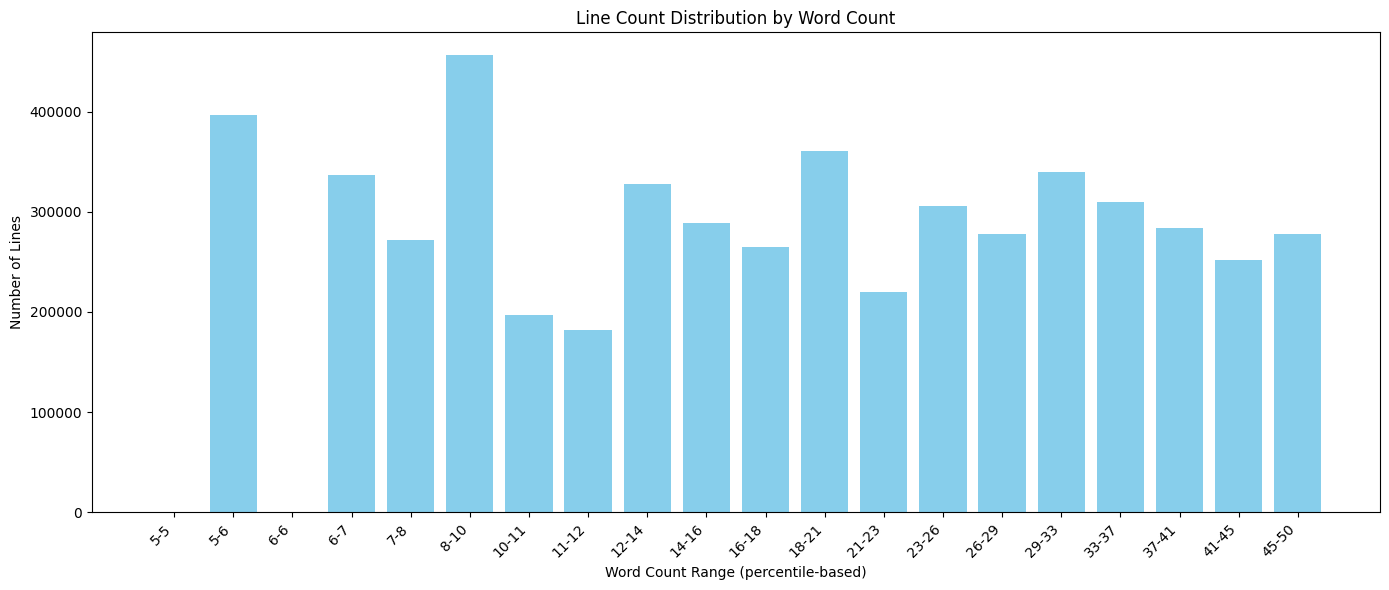

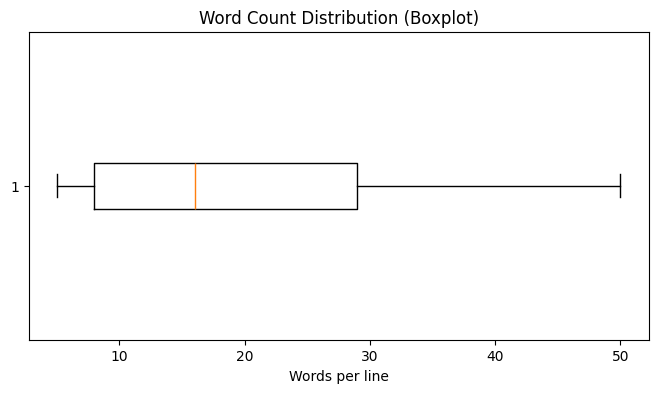

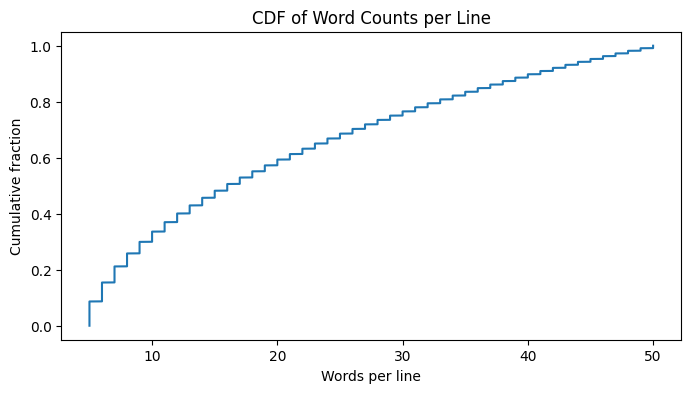

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
with open("main_5856427_116349202.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

# Count words in each line
word_counts = [len(line.split()) for line in lines]

# Compute percentiles for 20 bins
percentiles = np.percentile(word_counts, np.linspace(0, 100, 21))

# Assign each line to a bin
bins = np.digitize(word_counts, percentiles, right=True)

# Prepare data for plotting
bin_labels = [f"{int(percentiles[i])}-{int(percentiles[i+1])}" for i in range(len(percentiles)-1)]
bin_counts = [np.sum(bins == i+1) for i in range(len(bin_labels))]

# Plot histogram by percentile bins
plt.figure(figsize=(14,6))
plt.bar(bin_labels, bin_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Word Count Range (percentile-based)")
plt.ylabel("Number of Lines")
plt.title("Line Count Distribution by Word Count")
plt.tight_layout()
plt.show()

# Additional visualizations:

# 1. Boxplot
plt.figure(figsize=(8,4))
plt.boxplot(word_counts, vert=False)
plt.xlabel("Words per line")
plt.title("Word Count Distribution (Boxplot)")
plt.show()

# 2. CDF plot
sorted_counts = np.sort(word_counts)
cdf = np.arange(len(sorted_counts))/len(sorted_counts)
plt.figure(figsize=(8,4))
plt.plot(sorted_counts, cdf)
plt.xlabel("Words per line")
plt.ylabel("Cumulative fraction")
plt.title("CDF of Word Counts per Line")
plt.show()
